In [1]:
#Installing Python libraries.
import pandas as pd

In [3]:
# Loading the Retail_Data_Transactions.csv file into 'trxn' DataFrame.
trxn = pd.read_csv('datasets/Retail_Data_Transactions.csv')

In [4]:
# Viewing the 'trxn' DataFrame.
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
# Loading the Retail_Data_Transactions.csv file into 'trxn' DataFrame.
response= pd.read_csv('datasets/Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
# Merges the 'trxn' DataFrame with 'response' on 'customer_id' using a 'left join', keeping all records from trxn and adding matching data from response (filling missing values with NaN). 
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
# features
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [8]:
df.shape

(125000, 4)

In [9]:

df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [10]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [11]:
# MISSING VALUES --> in each coloum of the 'df' DataFrame
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [13]:

# Removes all rows from df that contain any NaN (missing) values. 
df=df.dropna()

df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [15]:
# change dtypes
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [16]:
#Converts the response column of df into a set, which removes duplicates and returns unique values in the column.
set(df['response'])

# If df['response'] contains [1, 0, 1, 1, 0, 2], the result would be: {0, 1, 2}

{0, 1}

In [17]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [18]:
# check for outliers --> in tran_amount column
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold --> if z-scoe value is greater than 3 then it is an outlier.

threshold = 3

outliers = z_scores > threshold


print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [19]:
# check for outliers --> in response column
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold = 3

outliers = z_scores>threshold


print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


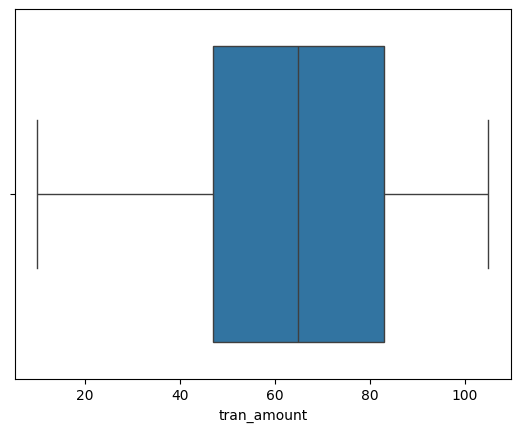

In [20]:
#  Visualize outliers in the tran_amount column using a boxplot.

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [22]:
# creating new columns
df['month']= df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [23]:
# Q] Which 3 months have had the highest transaction amounts?

# Groups data by the 'month' column and calculates the total 'tran_amount' for each month.
monthly_Sales = df.groupby('month')['tran_amount'].sum()

# Sorts total monthly sales in descending order, resets the index(to convert the grouped series back into a DataFrame), and keeps only the top 3 months.
monthly_Sales = monthly_Sales.sort_values(ascending=False).reset_index().head(3)

# Displays the top 3 months with the highest sales.
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [24]:
# Q] Customers having highest number of orders?

# Counts how many times each customer_id appears in the dataset (number of transactions per customer) and resets the index to create a DataFrame.
customer_counts = df['customer_id'].value_counts().reset_index()

# Renames the columns to 'customer_id' (unique customer IDs) and 'count' (number of transactions per customer).
customer_counts.columns=['customer_id','count']

# Sorts the customers by transaction count in descending order and selects the top 5 customers with the most transactions.
top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)

# Displays the final DataFrame showing the top 5 most active customers.
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

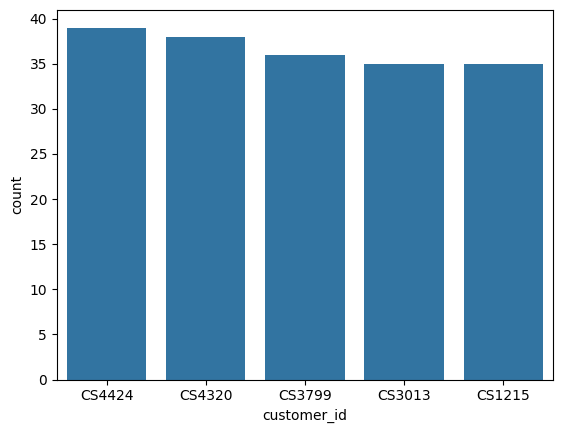

In [25]:
# Creates a bar chart to visualize the top 5 customers with the highest transaction counts
sns.barplot(x='customer_id',y='count',data=top_5_cus)

# x='customer_id' → Customer IDs are on the x-axis.
# y='count' → Number of transactions is on the y-axis.
# data=top_5_cus → Uses the top_5_cus DataFrame as the data source.

In [26]:
# Q] Customers having highest value of orders

# Groups the dataset by customer_id, sums the tran_amount for each customer, and resets the index to create a DataFrame.
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()

# Displays the DataFrame showing each customer's total transaction amount.
customer_sales

# Sorts customers by total sales in descending order and selects the top 5 highest-spending customers.
top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)

# Displays the final DataFrame containing the top 5 customers with the highest transaction amounts.
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

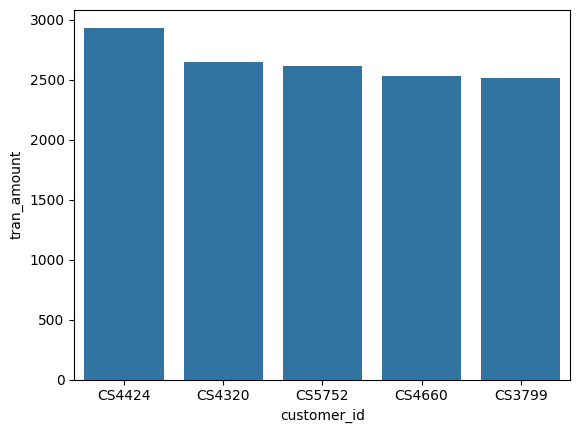

In [27]:
# Creates a bar chart using Seaborn to visualize the top 5 highest-spending customers
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

# X-axis: Customer IDs
# Y-axis: Total transaction amount
# Data: top_5_sal (top 5 customers by sales)

In [28]:
# Time series analytics is a technique used to analyze and interpret data points collected or recorded at specific time intervals. 
# The primary goal is to identify patterns, trends, and relationships within time-dependent data to make informed decisions and predictions.

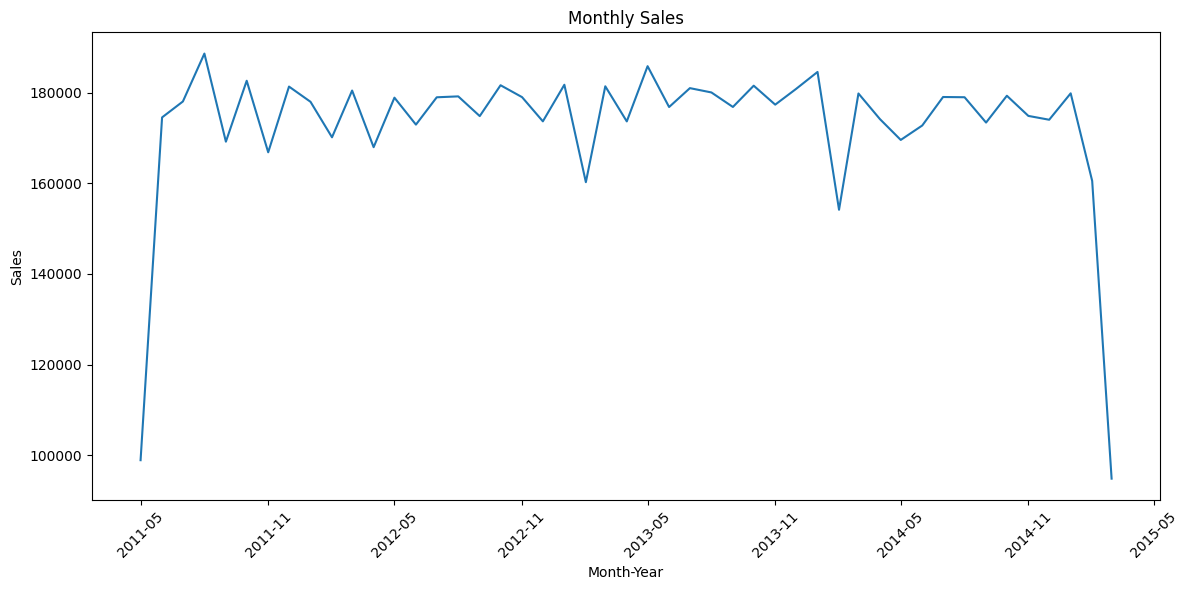

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extracts the year and month from trans_date and stores it as a period format (e.g., "2024-02").
df['month_year'] = df['trans_date'].dt.to_period('M')

# Groups data by month_year and sums up tran_amount for each month.
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

In [30]:
# Cohort segmentation is a technique used to group users or customers based on shared characteristics or experiences within a specific time period. 
# It helps businesses analyze behavior patterns over time, improving decision-making and customer retention strategies.

In [31]:
# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [33]:
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

# This line applies the segment_customer function to each row of the rfm DataFrame and assigns the resulting segment ('P0', 'P1', or 'P2') to a new column called 'Segment'.
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [34]:
set(rfm['Segment'])

{'P0', 'P2'}

In [35]:
# Churn analysis is the process of identifying and understanding why customers stop using a product or service. 
# It helps businesses predict and reduce customer attrition by analyzing behavioral patterns, demographics, and engagement history.

<Axes: xlabel='response'>

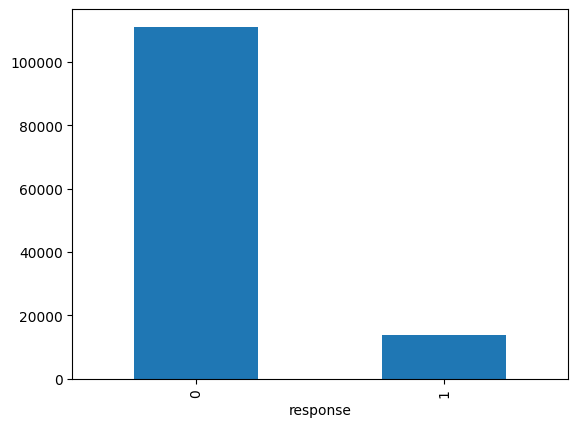

In [36]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')

# 0 --> potential churning customer

<Axes: xlabel='month_year'>

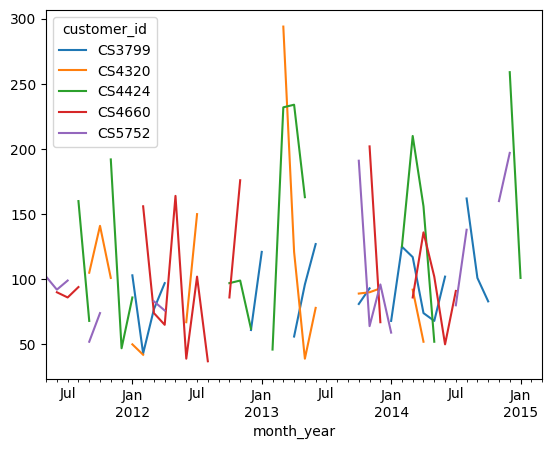

In [37]:

# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index
# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

In [38]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [39]:
# Saving two DataFrames to CSV files using pandas
df.to_csv('MainData.csv')
rfm.to_csv('AdditionalAnalysis.csv')